# Adult Income Exploratory Data Analysis

1. [Introduction](#1.-Introduction)
2. [Imports](#2.-Imports)
3. [Loading the data](#3.-Loading-the-data)
4. [Univariate Exploration](#4.-Univariate-Exploration)
5. [Multivariate Exploration](#5.-Multivariate-Exploration)
6. [Conclusion](#6.-Conclusion)


# 1. Introduction

This notebook is an exercise in exploratory data analysis. The intended audience comprises technical stakeholders. 

This data comes from the [UCI Machine Learning Repository](http://www.cs.toronto.edu/~delve/data/adult/desc.html). It describes individuals through various demographic, socioeconomic, and educational factors, with the goal of predicting whether they make greater than 50K in income.

The features that the data contains includes:
- **age**: (continuous) The age of the individual
- **workclass**: (nominal) The sector the individual works in. Possible values include Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: (continuous) "final weight". This indicates the number of people the census believes the individual represents.
- **education**: (nominal) The highest level of education achieved by the individual. Possible values include Bachelors, Some college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **educational-num**: (ordinal) "education" in numerical form.
- **marital-status**: (nominal) marital status of the individual.
- **occupation**: (nominal) Category of occupation. Includes Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,  Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,  Armed-Forces.
- **relationship**: (nominal) "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
- **race**: (nominal) "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
- **gender**: (nominal, binary) "Male" or "Female"
- **capital-gain**: (continuous) reported capital gains by the individual
- **capital-loss**: (continuous) reported capital losses by the individual
- **hours-per-week**: (continuous) hours reported working per week
- **native-country**: (nominal) The native country in which the individual resides.
- **income** (nominal, target): Whether or not the individual makes at least \\$50,000 per year. ">50K" for at least \\$50,000 and "<=50K" otherwise.

Some general questions we'd like to know about the data:
- What is the percentage of above 50k and below 50k income earners in the dataset? 
- Does our data contain missing values?

Trend-related questions:
- Does a higher education tend to yield a higher income? 
- Are income and age proportional? Do those who make greater than 50K tend to be older? 
- Is there an income equity gap among gender and racial groups?
- Do individuals with lower hourly work weeks tend to make more money?

Some takeaways that we'd like to derive from our EDA:
- What appear to be the most useful features in predicting incomes over \\$50K?
- Which features are correlated with each other?

The operating hypothesis is that education and specialized labor are correlated with higher income, meaning that we expect to see a higher portion of >50K income earners in higher education and labor brackets. Because education and training require years of investment, we also expect age to be correlated with high income.

# 2. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
def stacked_count_plot(data, x, hue, title, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(15, 7))
    tmp = data.groupby([x, hue]).size().reset_index().pivot(columns=hue, index=x, values=0.)
    tmp[tmp.isnull()] = 0
    tmp.plot.barh(stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Count')

# 3. Loading the data

In [3]:
data = pd.read_csv('data/adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The missing data is not represented as null, but rather '?'. Work class, occupation, and native country contain these missing values. We will not impute these as we are only performing EDA.

In [4]:
data[data == '?'].count() / data.count()

age                0.000000
workclass          0.057307
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057512
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017546
income             0.000000
dtype: float64

# 4. Univariate Exploration

## 4.1 Income

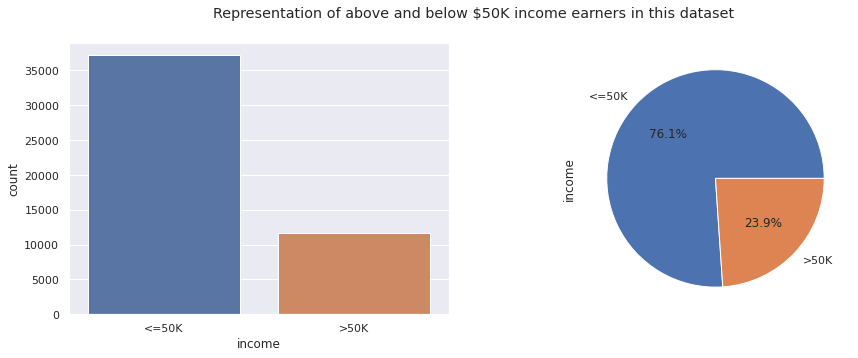

In [5]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='income', data=data, ax=axes[0])
data.income.value_counts(normalize=True).plot.pie(ax=axes[1], autopct='%1.1f%%')
plt.suptitle('Representation of above and below $50K income earners in this dataset');

There are more individuals that earn less than \\$50,000 represented in the dataset than those who earn more than \\$50,000, resulting in a 3:1 ratio.

## 4.2 Age 

Do older individuals tend to earn higher incomes?

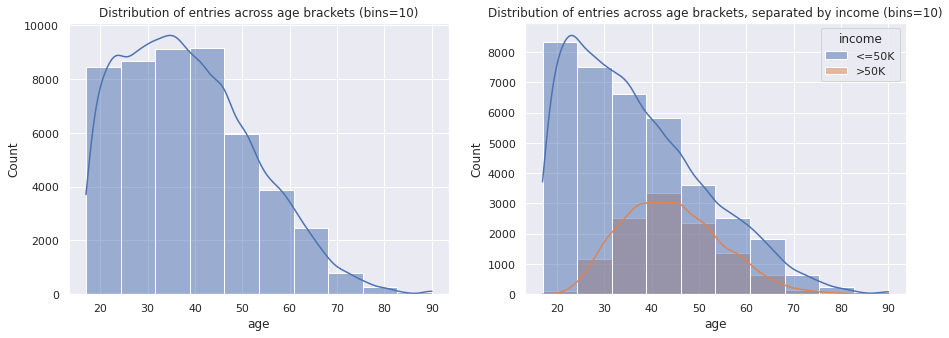

In [6]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

bins = 10
_ = sns.histplot(x='age', data=data, bins=bins, kde=True, ax=axes[0])
_ = sns.histplot(x='age', data=data, bins=bins, kde=True, ax=axes[1], hue='income')

axes[0].set_title(f'Distribution of entries across age brackets (bins={bins})')
axes[1].set_title(f'Distribution of entries across age brackets, separated by income (bins={bins})');

Focusing on the figure to the right, we observe that the two income earner groups have distinctly different distributions. The >50K group has a Gaussian-like distribution center around 40 years old, whereas the <=50K group has a right-skewed distribution with the most common age being around 20 and 30.

## 4.3 Work Class

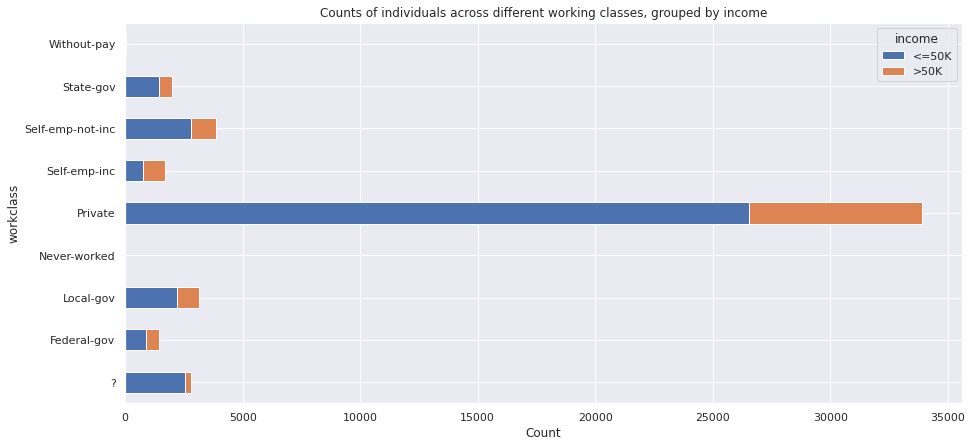

In [7]:
stacked_count_plot(data, x='workclass', hue='income', title='Counts of individuals across different working classes, grouped by income')

We can see that individuals who work for free ("Without pay") or never worked before ("Never-worked") have a negligible representation in our dataset. Those that work in the private sector have the largest representation. By grouping by income, Self-employed and incorporated individuals appear to have the highest portion of >50K earners. We can see this more clearly in the figure below:

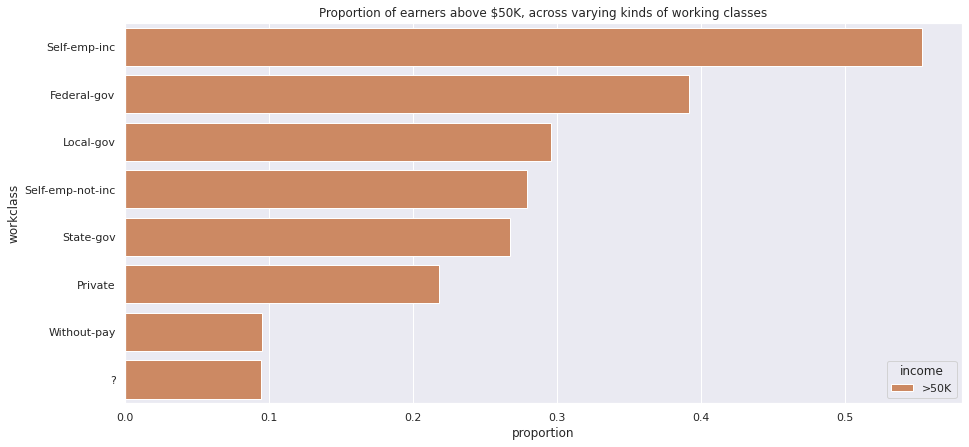

In [8]:
_, ax = plt.subplots(figsize=(15, 7))

workclass = data.income.groupby(data.workclass).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
workclass = workclass[workclass.income == '>50K'] 
workclass.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='workclass', hue='income', orient='h', ax=ax, palette=(sns.color_palette()[1],));
ax.set_title('Proportion of earners above $50K, across varying kinds of working classes');

About 55% of self-employed, incorporated employees and 39% of federal government employees in this dataset earn above $50,000.

## 4.4 Education

Does higher education tend to yield higher income? 

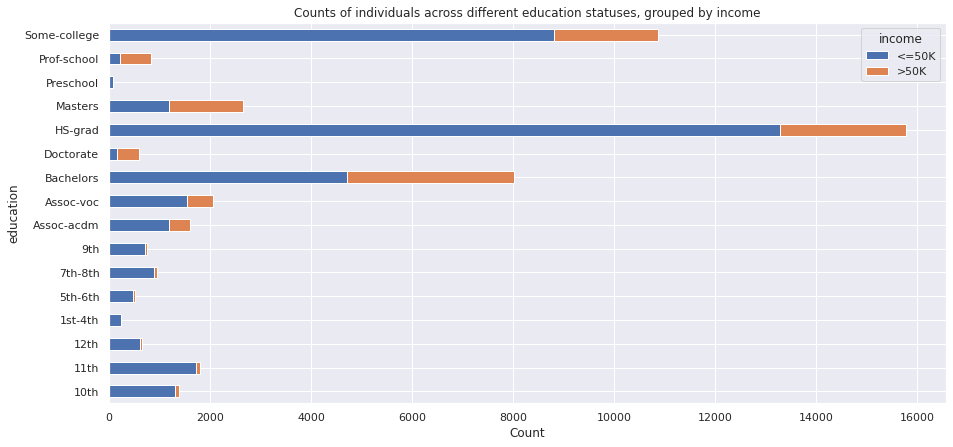

In [9]:
stacked_count_plot(data, x='education', hue='income', title='Counts of individuals across different education statuses, grouped by income')

Near the bottom of the figure, we see those who have only completed up to certain grades in high school education tend to have a lower proportion of income earners above $50K. By merging some of these categories, we can see this phenomenon more clearly below:

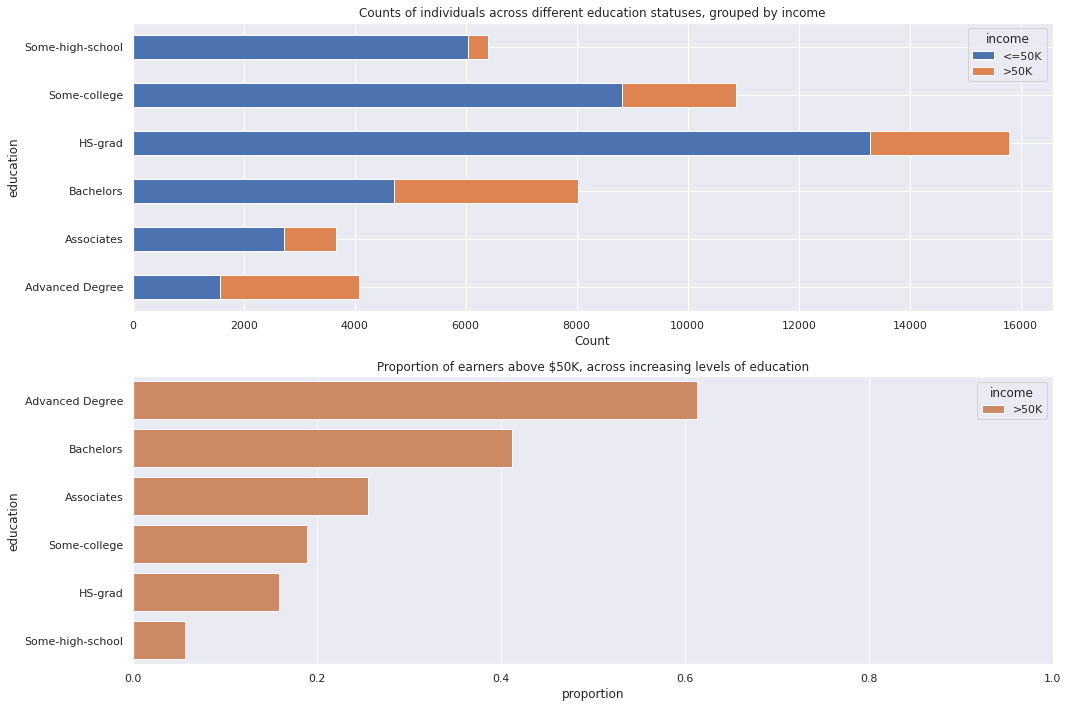

In [10]:
tmp = data.copy()
some_hs = [
 '11th', '10th', '7th-8th', '5th-6th', '9th', '12th','1st-4th', 'Preschool'
]
associates = ['Assoc-acdm', 'Assoc-voc']

tmp.loc[tmp.education.isin(['Prof-school', 'Masters', 'Doctorate']), 'education'] = 'Advanced Degree'
tmp.loc[tmp.education.isin(some_hs), 'education'] = 'Some-high-school'
tmp.loc[tmp.education.isin(associates), 'education'] = 'Associates'

_, axes = plt.subplots(2, 1, figsize=(15, 10))
stacked_count_plot(tmp, x='education', hue='income', title='Counts of individuals across different education statuses, grouped by income', ax=axes[0])

education = tmp.income.groupby(tmp.education).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
education = education[education.income == '>50K']
education.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='education', hue='income', orient='h', order=['Advanced Degree', 'Bachelors', 'Associates', 'Some-college', 'HS-grad', 'Some-high-school'], ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across increasing levels of education');
plt.tight_layout()

About 61% of individuals with an advanced degree (Masters, Doctorate, Professional School) and about 41% of Bachelor degree holders in this dataset are >50K income earners. Conversely, only about 19% of those who completed some amount of college-level education, ~16% of those who graduated high school, and ~6% who completed some high school achieved an income over $50K.

## 4.5 Marital Status

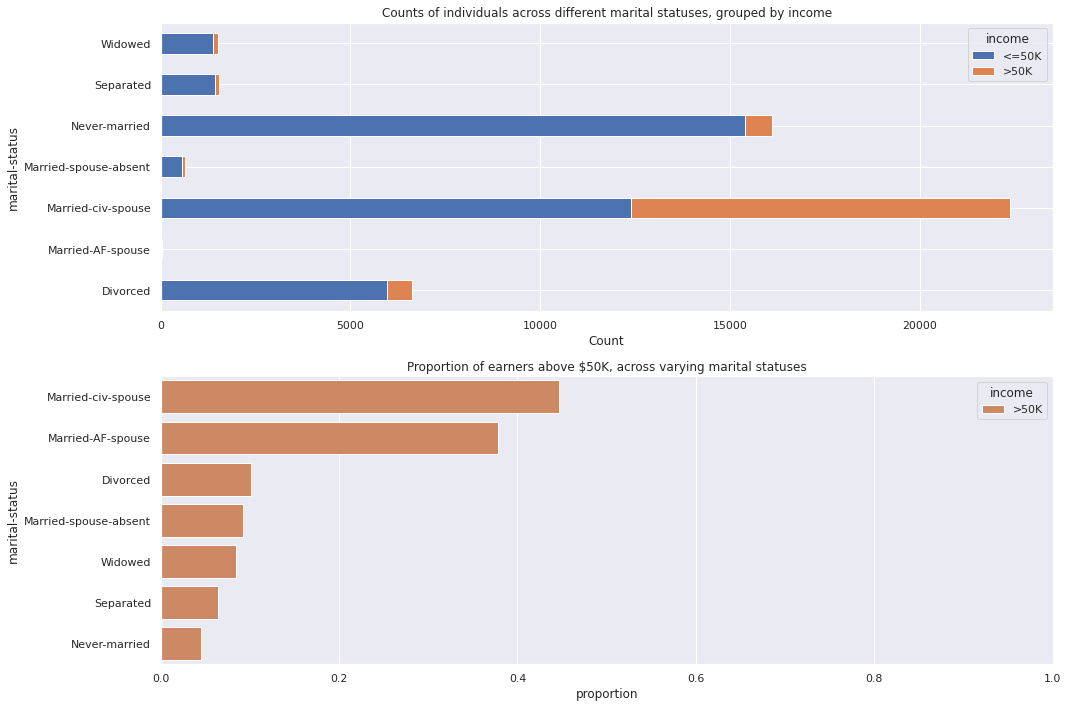

In [11]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

stacked_count_plot(data, x='marital-status', hue='income', title='Counts of individuals across different marital statuses, grouped by income', ax=axes[0])

marital = data.income.groupby(data['marital-status']).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
marital = marital[marital.income == '>50K']
marital.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='marital-status', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across varying marital statuses');

plt.tight_layout()

Much of the dataset comprises married civilians. They have by far the largest portion of >50K income earners.  The second largest population, individuals who have never been married, may have a lower portion of >50K income earners due to young age.

## 4.6 Occupation

What kind of occupations yield a higher income?

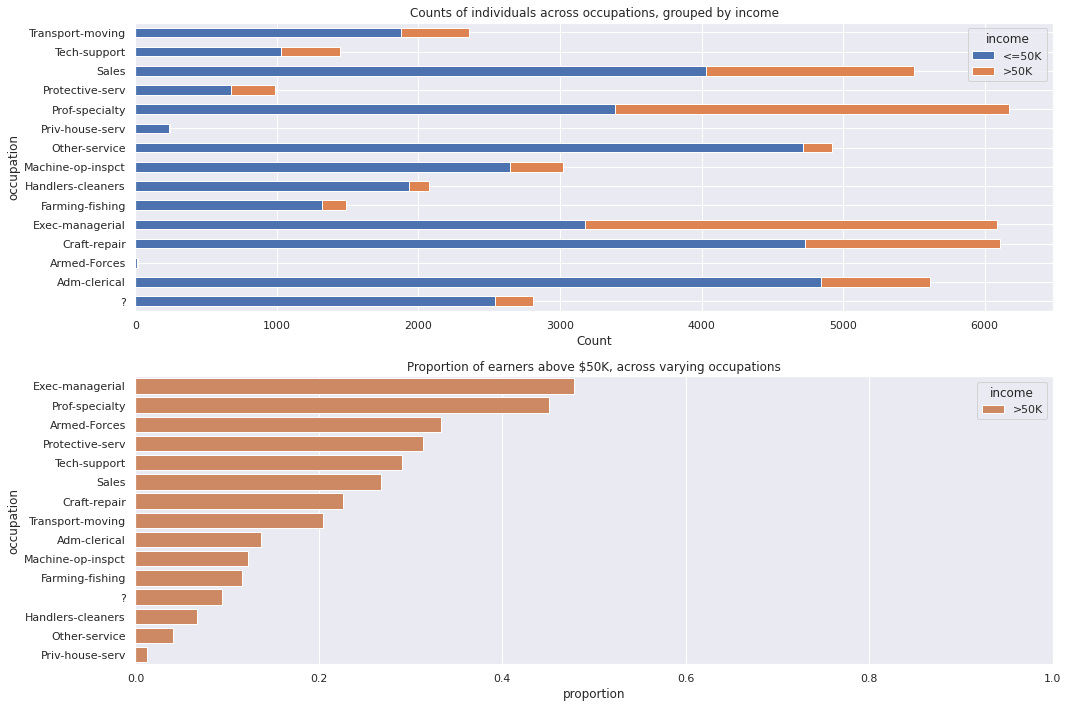

In [12]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

stacked_count_plot(data, x='occupation', hue='income', title='Counts of individuals across occupations, grouped by income', ax=axes[0])

occupation = data.income.groupby(data.occupation).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
occupation = occupation[occupation.income == '>50K']
occupation.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='occupation', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across varying occupations');

plt.tight_layout()

In the first figure, we see that executive managerial roles, professional specialty, craft repair, sales, and clerical services dominate the dataset. 

In the second figure, we observe of a trend of increasing specialization correlating with a higher proportion of >50K income earners.

## 4.7 Relationship


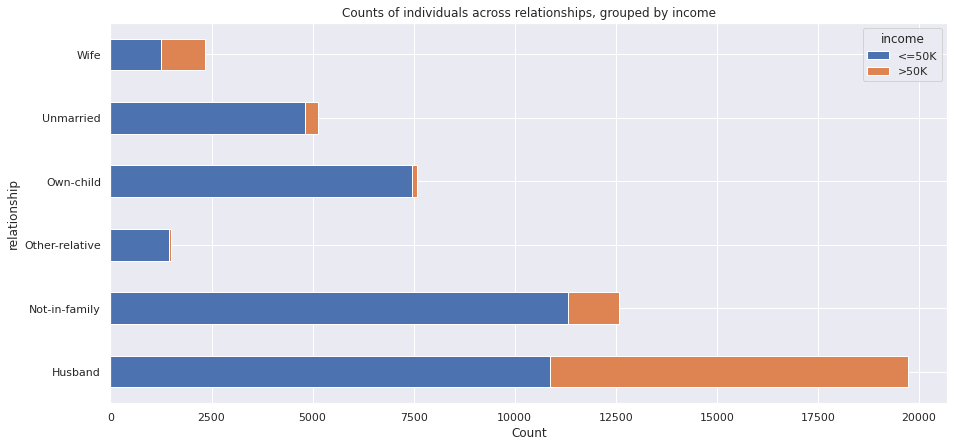

In [13]:
stacked_count_plot(data, x='relationship', hue='income', title='Counts of individuals across relationships, grouped by income')

Interestingly, those who were not in families tended to have incomes lower than $50K. This may be related to age. We observe that the mean age for those who are not in a family and have not yet been married is much lower than that of the entire dataset:

In [14]:
data[(data.relationship == 'Not-in-family') & (data['marital-status'] == 'Never-married')].age.mean()

31.836941242620185

In [15]:
data.age.mean()

38.64358543876172

## 4.8 Race

Is there an income gap across racial groups? 

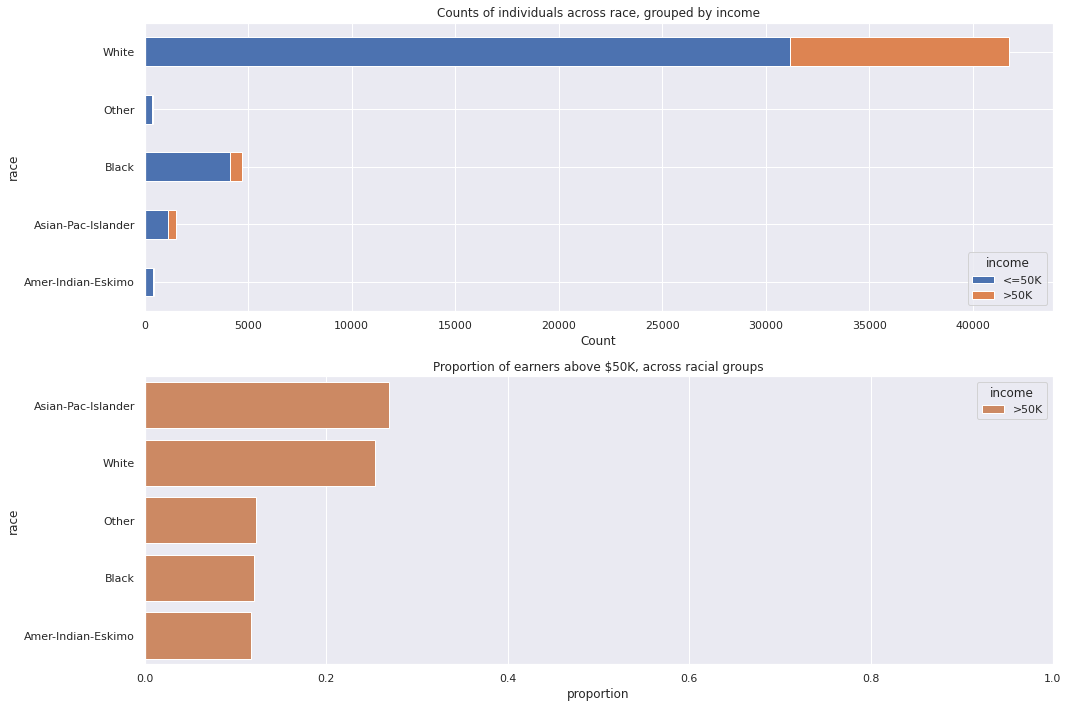

In [16]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

stacked_count_plot(data, x='race', hue='income', title='Counts of individuals across race, grouped by income', ax=axes[0])

race = data.income.groupby(data.race).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
race = race[race.income == '>50K']
race.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='race', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across racial groups');
plt.tight_layout()

White individuals account for almost 86% of the dataset so it is difficult to prove a significant difference between groups. However, we see that by comparing two minority populations like the Asian Pacific Islander and Black groups, we observe a large percentage difference (27% vs 12%) in the incidence of income earners above $50K.

## 4.9 Gender

Is there an income gap across genders? 

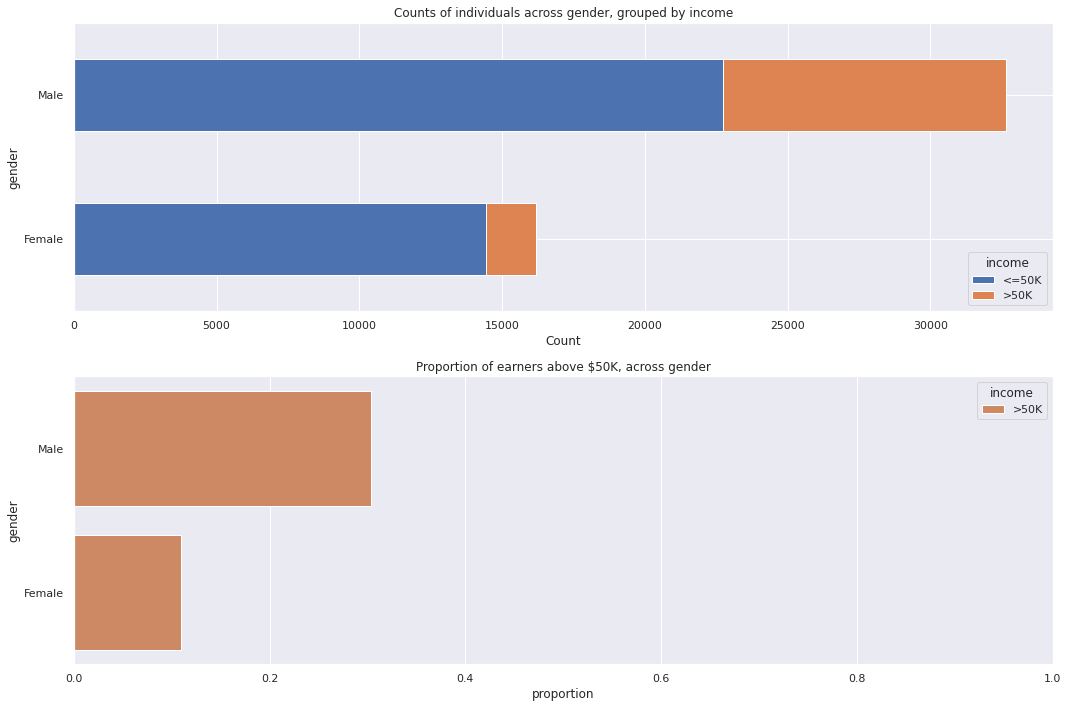

In [33]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))

stacked_count_plot(data, x='gender', hue='income', title='Counts of individuals across gender, grouped by income', ax=axes[0])

gender = data.income.groupby(tmp.gender).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
gender = gender[gender.income == '>50K']
gender.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='gender', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across gender')
plt.tight_layout()

We observe a large difference in the percentage of >50K income workers between male and female workers (~30% vs 11%). We see this inequity more pronounced by combining both race and gender below: 

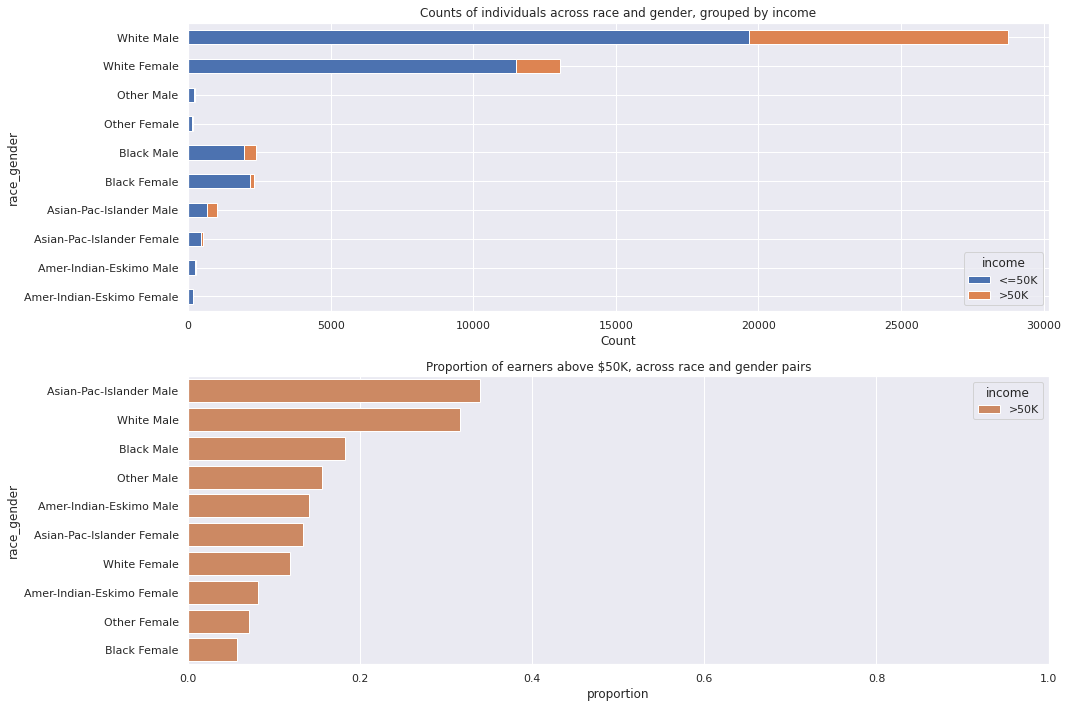

In [32]:
tmp = data.copy()
tmp['race_gender'] = tmp['race'] + ' ' + tmp['gender']

_, axes = plt.subplots(2, 1, figsize=(15, 10))

stacked_count_plot(tmp, x='race_gender', hue='income', title='Counts of individuals across race and gender, grouped by income', ax=axes[0])

race_gender = data.income.groupby(tmp.race_gender).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
race_gender = race_gender[race_gender.income == '>50K']
race_gender.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='race_gender', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across race and gender pairs')
plt.tight_layout()

White male workers have the highest portion of >50K income earners by far, with ~31.5%. Conversely, Black female workers have the least with ~5.7%. All female racial sub-categories have a lower percentage of >50K income earners than that of the lowest earning male racial sub-category, American Indian/Eskimo male with about 14%.

## 4.10 Capital Gains and Losses

One would expect that higher capital gains correlate with high income earnings. In a similar vein, high capital losses may also be correlated, since it implies sufficient disposable income to invest in assets. 


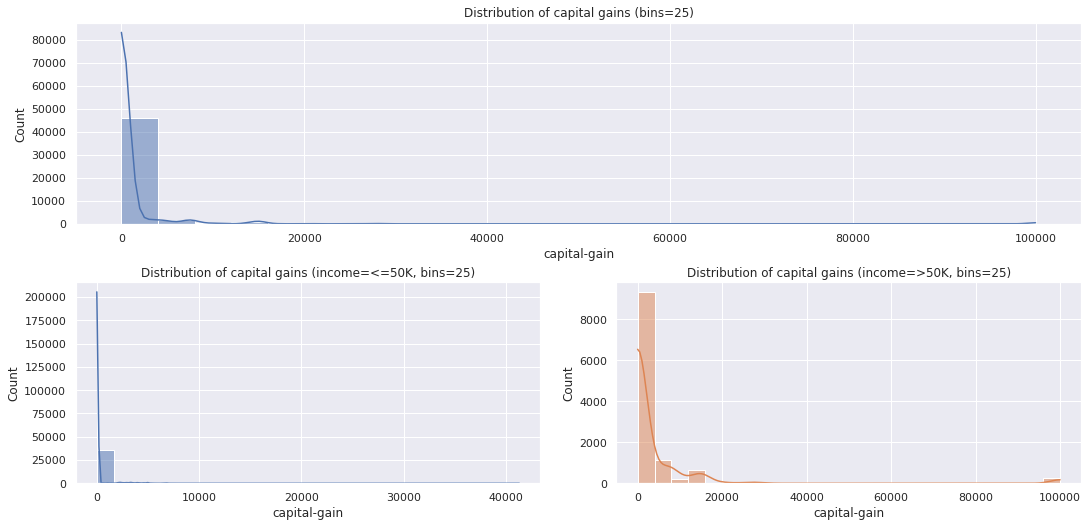

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = fig.add_gridspec(3, 2)

axes = [fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]

bins = 25
_ = sns.histplot(x='capital-gain', data=data, bins=bins, kde=True, ax=axes[0])
_ = sns.histplot(x='capital-gain', data=data[data.income == '<=50K'], bins=bins, kde=True, ax=axes[1])
_ = sns.histplot(x='capital-gain', data=data[data.income == '>50K'], bins=bins, kde=True, ax=axes[2], color=sns.color_palette()[1])

axes[0].set_title(f'Distribution of capital gains (bins={bins})')
axes[1].set_title(f'Distribution of capital gains (income=<=50K, bins={bins})')
axes[2].set_title(f'Distribution of capital gains (income=>50K, bins={bins})');

When comparing the distribution of capital gains across earners above and below 50K, they are both similarly right-skewed. However, the former has a slightly thicker tail, indicating that there is a higher portion of individuals in the >50K group that have accrued higher capital gains than that of the <=50K group.

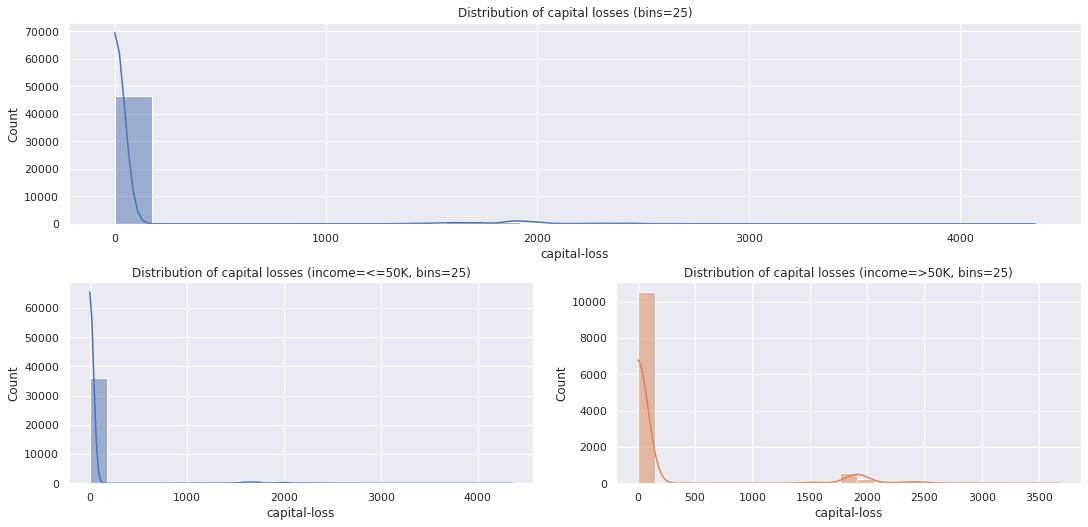

In [20]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = fig.add_gridspec(3, 2)

axes = [fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]

bins = 25
_ = sns.histplot(x='capital-loss', data=data, bins=bins, kde=True, ax=axes[0])
_ = sns.histplot(x='capital-loss', data=data[data.income == '<=50K'], bins=bins, kde=True, ax=axes[1])
_ = sns.histplot(x='capital-loss', data=data[data.income == '>50K'], bins=bins, kde=True, ax=axes[2], color=sns.color_palette()[1])

axes[0].set_title(f'Distribution of capital losses (bins={bins})')
axes[1].set_title(f'Distribution of capital losses (income=<=50K, bins={bins})')
axes[2].set_title(f'Distribution of capital losses (income=>50K, bins={bins})');

We see similar right-skewed distributions to those of the capital gains features. However, we see less of a difference in shapeliness across income groups.

## 4.11 Hours Per Week

There are at least two paths of logical reasoning with which to approach the predictive nature of the hours per work week measure: (1) those who work more hours tend to accrue more capital, thereby having a higher proportion of incomes above $50K or (2) those with higher incomes are afforded more flexibility to work fewer hours, and thus, we should expect a higher proportion of >50K income earners in the group that works less than standard work week. The latter seems more likely. Let's divide the dataset by the standard 40 hour work week:

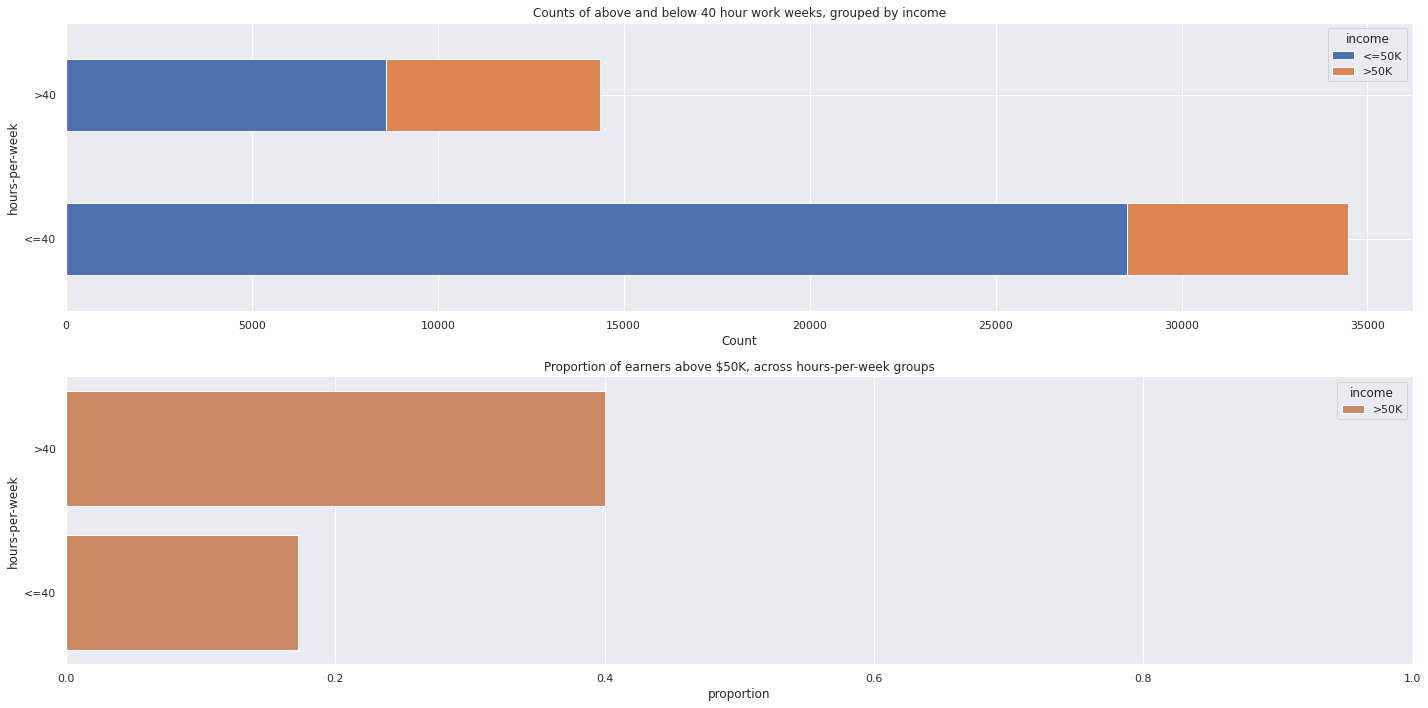

In [31]:
tmp = pd.DataFrame(index=data.index)
tmp.loc[data['hours-per-week'] <= 40, 'hours-per-week'] = '<=40'
tmp.loc[data['hours-per-week'] > 40, 'hours-per-week'] = '>40'
tmp['income'] = data.income

_, axes = plt.subplots(2, 1, figsize=(20, 10))

stacked_count_plot(tmp, x='hours-per-week', hue='income', title='Counts of above and below 40 hour work weeks, grouped by income', ax=axes[0])

hours = tmp.income.groupby(tmp['hours-per-week']).value_counts(normalize=True)\
    .rename('proportion')\
    .reset_index()
hours = hours[hours.income == '>50K']
hours.sort_values(by='proportion', ascending=False)\
    .pipe((sns.barplot, 'data'), x='proportion', y='hours-per-week', hue='income', orient='h', ax=axes[1], palette=(sns.color_palette()[1],))
axes[1].set_xlim([0, 1])
axes[1].set_title('Proportion of earners above $50K, across hours-per-week groups')
plt.tight_layout()

Here, we can see that the group of individuals have at most a 40 hour work week has a lower incidence of those who earn over 50K per year (~17% vs ~40%). This conflicted with our expectations.

# 5. Multivariate Exploration


In [23]:
numerical_features = ['fnlwgt', 'age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

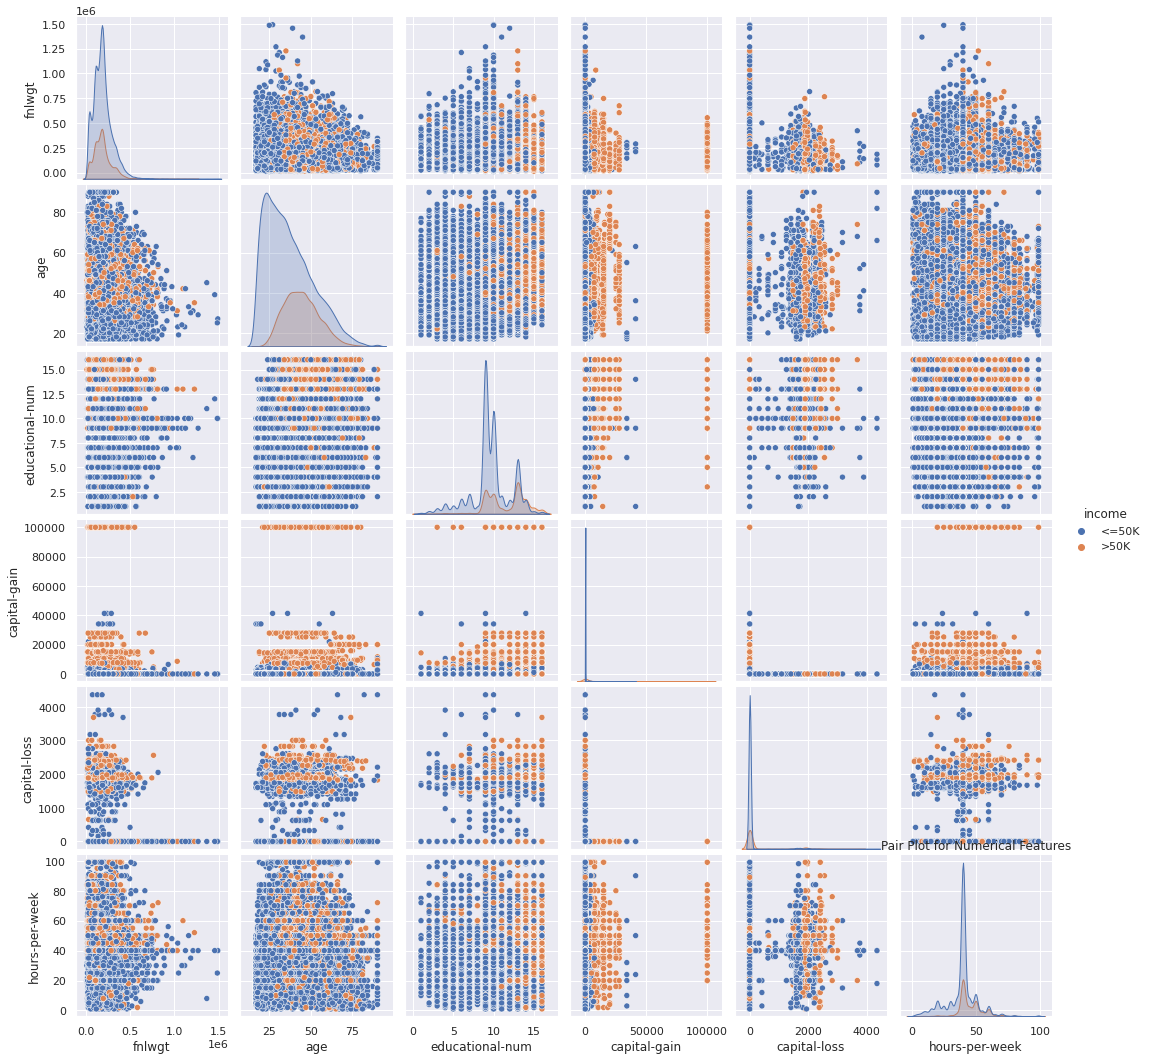

In [24]:
sns.pairplot(data[numerical_features + ['income']], hue='income');
plt.title('Pair Plot for Numerical Features');

Features like capital gain, age, education, and hours per week induce high separability between the two income groups:

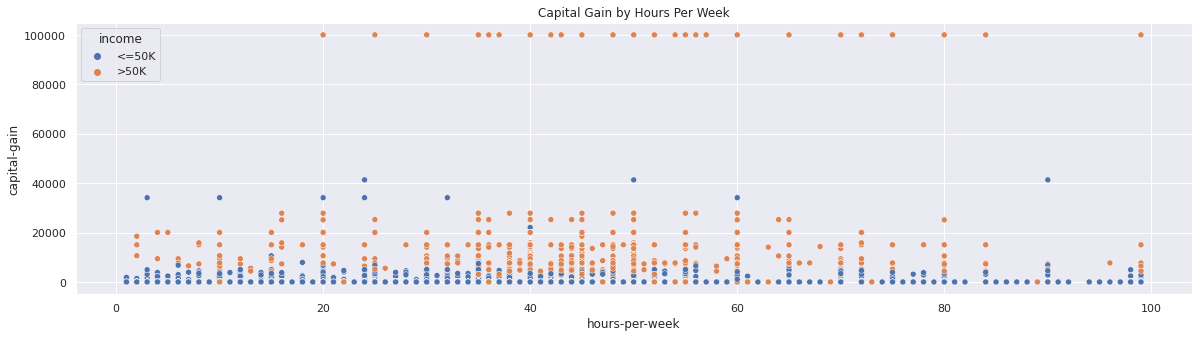

In [25]:
_, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='hours-per-week', y='capital-gain', data=data, hue='income', ax=ax)
plt.title('Capital Gain by Hours Per Week');

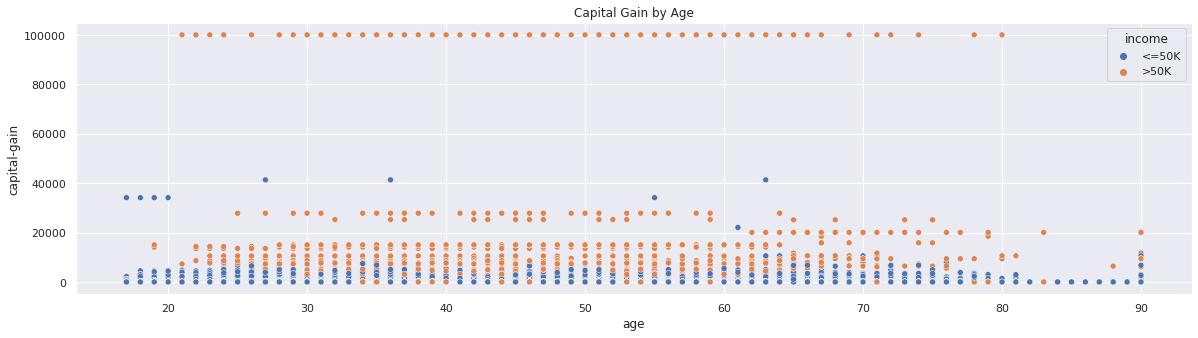

In [26]:
_, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='age', y='capital-gain', data=data, hue='income', ax=ax)
plt.title('Capital Gain by Age');

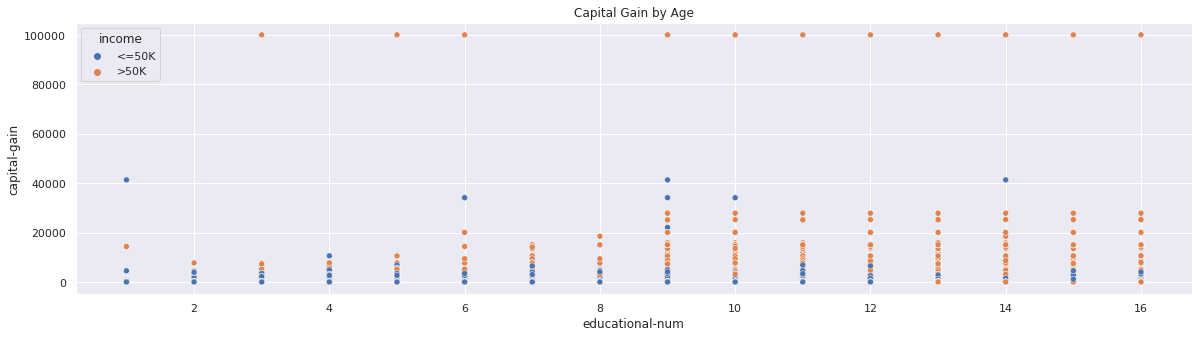

In [27]:
_, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='educational-num', y='capital-gain', data=data, hue='income', ax=ax)
plt.title('Capital Gain by Age');

In [28]:
corr = data[numerical_features].corr()

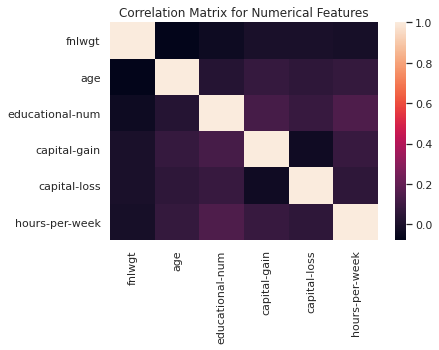

In [29]:
sns.heatmap(corr);
plt.title('Correlation Matrix for Numerical Features');

There is a slight correlation between education and capital gains and education and hours per week, but the features are mostly uncorrelated.

# 6. Conclusion

Let's revisit some of our initial questions:

**What is the percentage of above 50k and below 50k income earners in the dataset?**

We found that there is about a 3:1 ratio between individuals who earn at most \\$50K and those who earn above \\$50K.


**Does our data contain missing values?** Work class, occupation, and native country contain missing values (~5.7%, ~5.7%, and 1.7% are missing respectively).

**Does a higher education tend to yield a higher income?**
We observed that about 61% of individuals with an advanced degree (Masters, Doctorate, Professional School) and about 41% of Bachelor degree holders in this dataset are >50K income earners. Conversely, only about 19% of those who completed some amount of college-level education, ~16% of those who graduated high school, and ~6% who completed some high school achieved an income over $50K.


**Are income and age proportional? Do those who make greater than 50K tend to be older?**

We observed that those who make greater than 50K tend to be older. The >50K group has a Gaussian-like distribution center around 40 years old, whereas the <=50K group has a right-skewed distribution with the most common age being around 20 and 30.

**Is there an income equity gap among gender and racial groups?**

There are noticeable income differences related to race and gender.

Asian and White populations had the highest portion of >50K income earners with ~27% and ~25% respectively. Groups like the Black population had a comparatively low proportion of ~12%. White individuals accounted for about 86% of the dataset. 

Male workers had a larger percentage of >50K earners than female workers (~30% vs ~11%). 

We observed an even more pronounced inequity by combining both race and gender. White male workers have the highest portion of >50K income earners by far, with ~31.5%, as opposed to the lowest earners, Black female workers, with ~5.7%. All female racial sub-categories have a lower percentage of >50K income earners than that of the lowest earning male racial sub-category, American Indian/Eskimo male with about 14%.

**Do individuals with lower hourly work weeks tend to make more money?**
Subverting our initial expectations, those who worked more than a standard 40-hour work week tended to have a larger percentage of >50K earners than those that did not (~40% vs ~17%)

**What appear to be the most useful features in predicting incomes over \\$50K?**

Capital gains, age, race, gender, education, and hours per week appear to be the strongest predictors of incomes larger than $50K. We observed that bivariate plots that paired capital gains with age, education, or hours per week clearly separated the two income groups.

**Which features are correlated with each other?**
No features yielded notable correlation.

